# fractals

Examples from Chapter 41 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [1]:
import numpy as np
from math import cos, pi
def f(a,b,x,n):
    nvals=np.linspace(0,n,n)
    def w(n):
        return a**n*cos(x*pi*b**n)
    return sum(map(w, nvals))

In [2]:
a=.5
b=(1+3*pi/2)/a + 1

In [3]:
a,b

(0.5, 12.42477796076938)

In [4]:
f(a,b,2,200)

0.3610534834761821

In [5]:
x=np.linspace(0,5,500)

In [7]:
y=[f(a,b,q,200) for q in x]

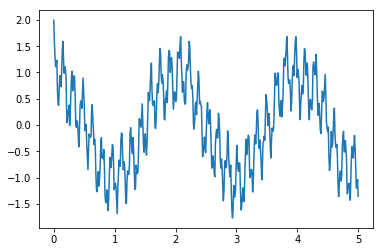

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y)

In [15]:
import numpy as np
def koch(start, finish,n):
    if n<=0:
        return(zip(start, finish))       
    P=np.array(start); Q=np.array(finish)
    V=Q-P
        # Normal vector
    M=np.array([[0,-(np.sqrt(3.0)/6.0)],
                [(np.sqrt(3.0)/6.0),0]])
    N=M.dot(V)
    # Three intermediate points
    A=P+(1.0/3.0)*V
    B=0.5*(Q+P)+N
    C=P+(2.0/3.0)*V
    
    # calculate x and y for edge
    if n<=1:
        xvals,yvals = zip(*map(list,[P,A,B,C,Q]))
        return(xvals, yvals)
    # make recursive call
    
    starts=[P,A,B,C]
    stops=[A,B,C,Q]
    results = map(lambda x, y : koch(x,y,n-1), starts, stops)

    # unpack and flatten
    xvals, yvals = zip(*results)
    xvals= [x for subl in map(list, xvals) for x in subl]
    yvals= [y for subl in map(list, yvals) for y in subl]
    return(xvals, yvals)

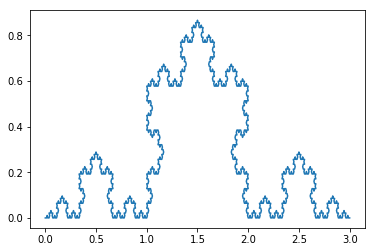

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x,y=koch([0,0],[3,0],5)
plt.plot(x,y)

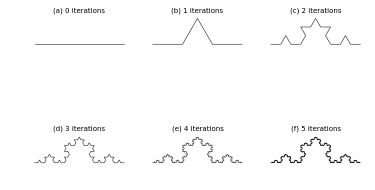

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axx=plt.subplots(nrows=2,ncols=3)
n=0
labels=["(a) ","(b) ","(c) ","(d) ","(e) ","(f) "]
for row in 0,1:
    for column in 0,1,2:
        ax=axx[row,column]
        x,y=koch([0,0],[3,0],n)
        ax.plot(x,y,lw=.5,c="k")
        mytitle=labels[n]+str(n) + " iterations"       
        ax.set_title(mytitle, fontsize=7)
        ax.set_aspect("equal")
        ax.axis("off")
        ax.set_ylim(-.1,.9)
        n+=1

In [18]:
def snowflake(n):
    xb,yb=koch([1,0],[0,0],n)
    xl,yl=koch([0,0], [.5,.5*np.sqrt(3)], n)
    xr,yr=koch([.5, .5*np.sqrt(3)], [1,0], n)
    xsides=[xl, xr, xb]
    ysides=[yl, yr, yb]
    xvals=[x for side in xsides for x in side]
    yvals=[y for side in ysides for y in side]
    return(xvals, yvals)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def sierpinski(points, n):
    if n<=0:
        return
    if n<=1:
       xvals,yvals=map(list,zip(*points))

       xvals.append(xvals[0])
       yvals.append(yvals[0])
       plt.plot(xvals,yvals,c="k",linewidth=.5)
       return
    A,B,C=map(np.array, points)
    AB=(A+B)/2.0
    BC=(B+C)/2.0
    CA=(C+A)/2.0
    sierpinski([A,AB,CA],n-1)
    sierpinski([AB,B,BC],n-1)
    sierpinski([CA,BC,C],n-1)

(-0.05, 1.05, -0.05, 1.05)

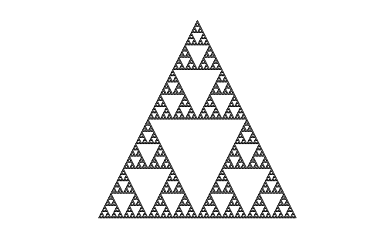

In [20]:
sierpinski([[0,0],[1,0],[.5,1]],8)
plt.axis("equal")
plt.axis("off")

In [37]:
import random
A0= lambda P: ((P[0]/3., P[1]/3.))
A1= lambda P: ((1+(P[0]-1)/3., P[1]/3.))

def iterate(n,p):
    x=p
    for i in range(n):
      x = A0(x) if random.randint(0,1)==0 else A1(x)
    return(x)

def Cantor(npts):
    startingPoint = (random.random(), random.random())
    return list(zip(*[iterate(25,startingPoint) 
       for i in range(npts)])  )

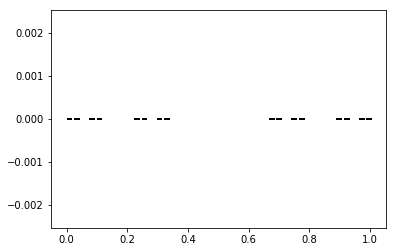

In [43]:
x,y =  Cantor(3000)
plt. scatter(x,y,c="k",marker=",", s=1)

In [57]:
def julia(f,x0,y0,xmax,ymax,Rmax=10,Nmax=100,p=100,q=100):
    DeltaX=(xmax-x0)/p
    DeltaY=(ymax-y0)/q
    A=np.zeros([p,q])
    for k in range(p):
        x=x0+k*DeltaX
        for j in range(q):
            y=y0+j*DeltaY
            z=x+y*(1j)
            n=1
            while abs(z)<Rmax and n < Nmax:
                z=f(z)
                n+=1
            if abs(z)>Rmax:
                A[k,j]=0
            else:
                A[k,j]=1
    return A
                
            

In [58]:
def f(z):
    C=-0.8-0.15j
    return z*z+C

In [81]:
J=julia(f,-1,-.25,1,.25,Rmax=10,Nmax=100,p=300,q=300)

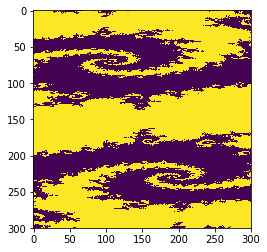

In [82]:
plt.imshow(J)


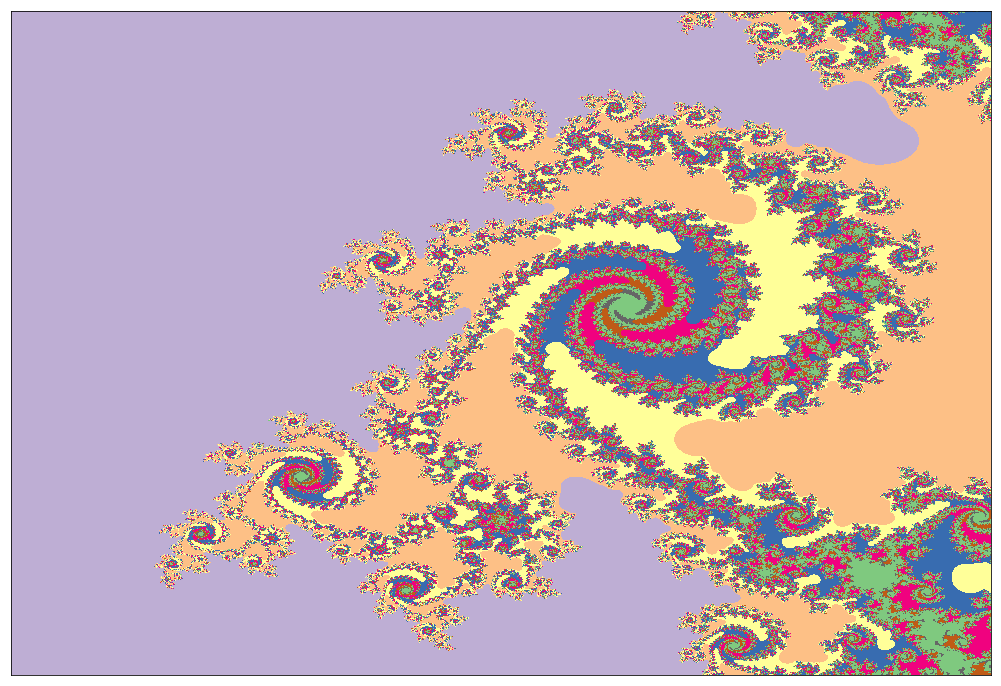

In [118]:
def mand(C, zmax=10, n=100):
    z=C
    for j in range(n):
        z=z*z+C
        if abs(z)>zmax:
            return(j)
    return(0)
def mandelbrot(xc=0.2323,yc=-0.5345,r=.0025,pixels=200,zmax=3,N=100):
    xmin=xc-r; xmax=xc+r
    ymin=yc-r; ymax=yc+r
    xvals=np.linspace(xmin,xmax,pixels)
    yvals=np.linspace(ymin,ymax,pixels)
    dy=(ymax-ymin)/pixels
    dx=(ymax-ymin)/pixels
    image=np.ones((pixels,pixels))
    for ix in range(pixels):
        for iy in range(pixels):
            z = (xmin+dx*ix)+(1j)*(ymin+dy*iy)
            image[iy,ix]=mand(z,zmax,N)
    return(image)
i=mandelbrot(zmax=5,N=200,pixels=3000)
plt.imshow(i,cmap="Accent")
plt.xticks([]); plt.yticks([])
ax = plt.gca()
xinches=15.11
yinches=10.25
ax.set_aspect(yinches/xinches)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(xinches,yinches)
fig.savefig("somefractal.png",dpi=300)


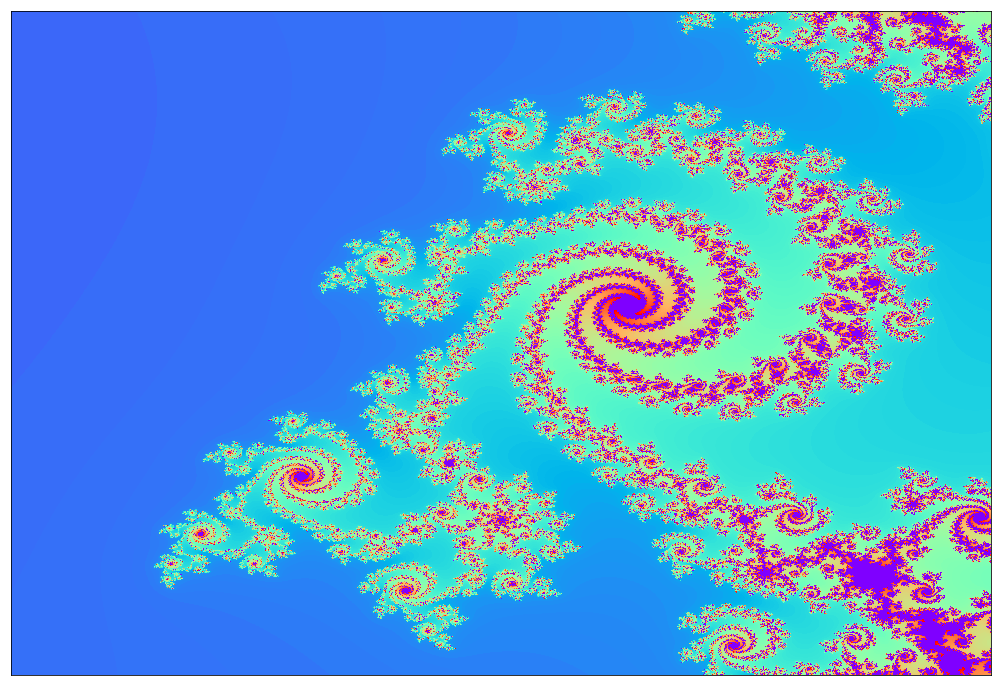

In [120]:
plt.imshow(i,cmap="rainbow")
plt.xticks([]); plt.yticks([])
ax = plt.gca()
xinches=15.11
yinches=10.25
ax.set_aspect(yinches/xinches)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(xinches,yinches)
fig.savefig("rainbow.png",dpi=300)

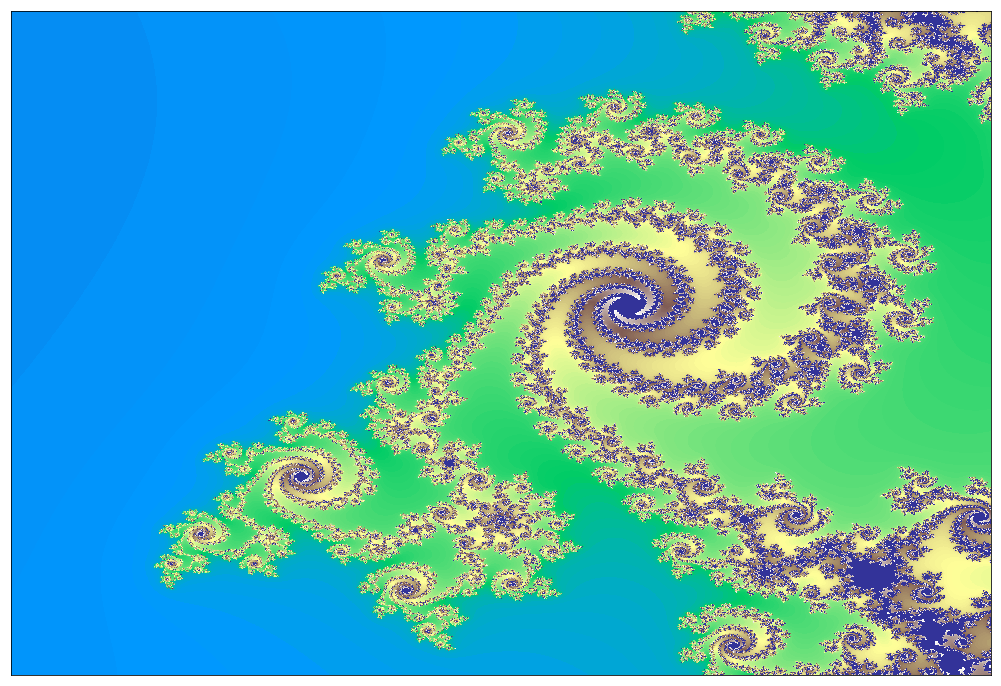

In [123]:
plt.imshow(i,cmap="terrain")
plt.xticks([]); plt.yticks([])
ax = plt.gca()
xinches=15.11
yinches=10.25
ax.set_aspect(yinches/xinches)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(xinches,yinches)
fig.savefig("terrain.png",dpi=300)